<a href="https://colab.research.google.com/github/daeyeong8855/statistical_data_analysis/blob/main/%ED%86%B5%EA%B3%84_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EA%B2%B0%EC%B8%A1%EC%B9%98_%EC%B2%98%EB%A6%ACipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 결측치 위치 확인

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'A' : [1,2,np.nan, 4, 5],
    'B' : [np.nan, np.nan, 6,7,8],
    'C' : [9,10,11,12, np.nan]
})

print(data)

     A    B     C
0  1.0  NaN   9.0
1  2.0  NaN  10.0
2  NaN  6.0  11.0
3  4.0  7.0  12.0
4  5.0  8.0   NaN


In [ ]:
# NaN = True
print(data.isnull())

       A      B      C
0  False   True  False
1  False   True  False
2   True  False  False
3  False  False  False
4  False  False   True


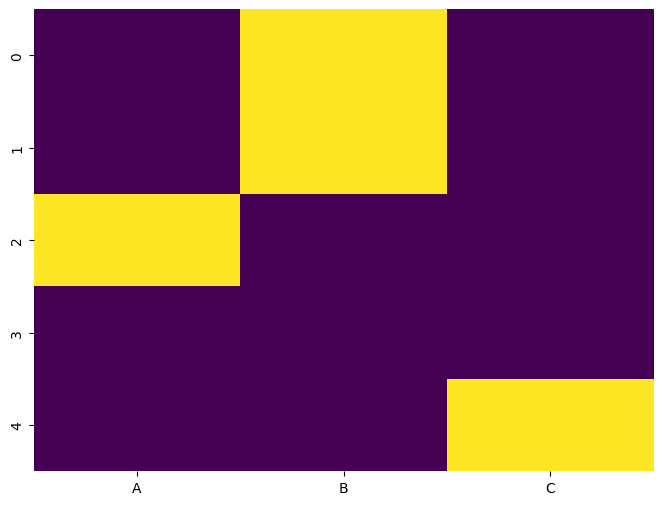

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)
plt.show()

# 결측치 개수

In [ ]:
print(data.isnull().sum())

A    1
B    2
C    1
dtype: int64


## 결측치 삭제

In [ ]:
dates = pd.date_range(start='2023-01-01', periods=50, freq='D')
values = np.random.randn(50)
values[10]=np.nan

data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})


print(data.iloc[10])

data_without_missing = data.dropna(axis=0)

Date     2023-01-11 00:00:00
Value                    NaN
Name: 10, dtype: object


## 선형보간
결측치를 선형적인 값으로 대체

In [ ]:
dates = pd.date_range(start='2023-01-01', periods=10, freq='D')
values = [1, np.nan, 3, np.nan, 5, 6, np.nan, 8, 9, np.nan]

data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

print(data)

        Date  Value
0 2023-01-01    1.0
1 2023-01-02    NaN
2 2023-01-03    3.0
3 2023-01-04    NaN
4 2023-01-05    5.0
5 2023-01-06    6.0
6 2023-01-07    NaN
7 2023-01-08    8.0
8 2023-01-09    9.0
9 2023-01-10    NaN


In [ ]:
data["Value_linear"] = data['Value'].interpolate(method='linear')
print(data)

        Date  Value  Value_linear
0 2023-01-01    1.0           1.0
1 2023-01-02    NaN           2.0
2 2023-01-03    3.0           3.0
3 2023-01-04    NaN           4.0
4 2023-01-05    5.0           5.0
5 2023-01-06    6.0           6.0
6 2023-01-07    NaN           7.0
7 2023-01-08    8.0           8.0
8 2023-01-09    9.0           9.0
9 2023-01-10    NaN           9.0


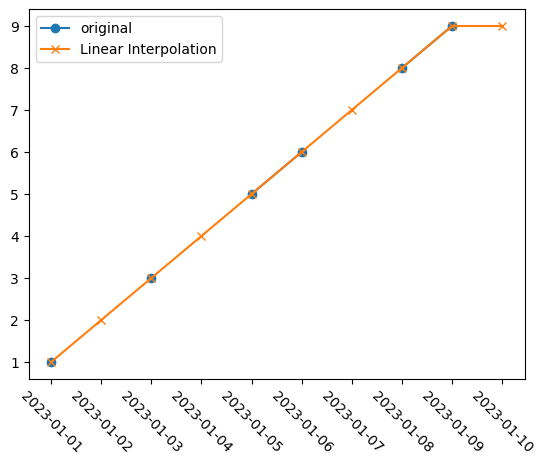

In [ ]:
plt.plot(data['Date'], data['Value'], 'o-', label='original')
plt.plot(data['Date'], data['Value_linear'], 'x-', label='Linear Interpolation')
plt.legend()
plt.xticks(rotation=-45)
plt.show()

## 스플라인 보간 : 다항 보간
유효한 데이터에 대해서만 가능<br>
연속성 있는 데이터에서 적용 -> 결측값을 제거한 뒤 사용

In [ ]:
from scipy.interpolate import CubicSpline

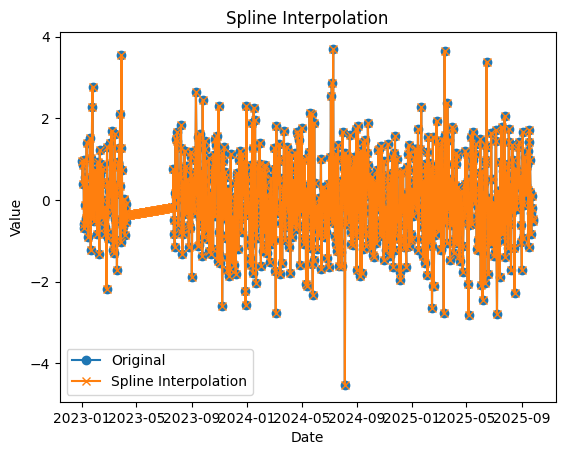

In [ ]:
dates = pd.date_range(start='2023-01-01', periods=1000, freq='D')
values = np.random.randn(1000)

data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

data.loc[100:200, 'Value'] = np.nan

data['Value_filed'] = data['Value'].interpolate(method='linear')

spl = CubicSpline(data.index, data['Value_filed'])
data['Value_spline'] = spl(data.index)

# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], 'o-', label='Original')
plt.plot(data['Date'], data['Value_spline'], 'x-', label='Spline Interpolation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Spline Interpolation')
plt.legend()
plt.show()

In [ ]:
data.loc[50:200, 'Value'] = np.nan
print(data.loc[50:200])

          Date  Value  Value_filed  Value_spline
50  2023-02-20    NaN    -0.652002     -0.652002
51  2023-02-21    NaN    -0.833830     -0.833830
52  2023-02-22    NaN    -0.235460     -0.235460
53  2023-02-23    NaN    -0.337695     -0.337695
54  2023-02-24    NaN    -2.178558     -2.178558
..         ...    ...          ...           ...
196 2023-07-16    NaN    -0.185704     -0.185704
197 2023-07-17    NaN    -0.183796     -0.183796
198 2023-07-18    NaN    -0.181888     -0.181888
199 2023-07-19    NaN    -0.179980     -0.179980
200 2023-07-20    NaN    -0.178072     -0.178072

[151 rows x 4 columns]


In [ ]:
data['Value_filled'] = data['Value'].interpolate(method='nearest')
print(data.loc[201])

Date            2023-07-21 00:00:00
Value                     -0.176163
Value_filed               -0.176163
Value_spline              -0.176163
Value_filled              -0.176163
Name: 201, dtype: object


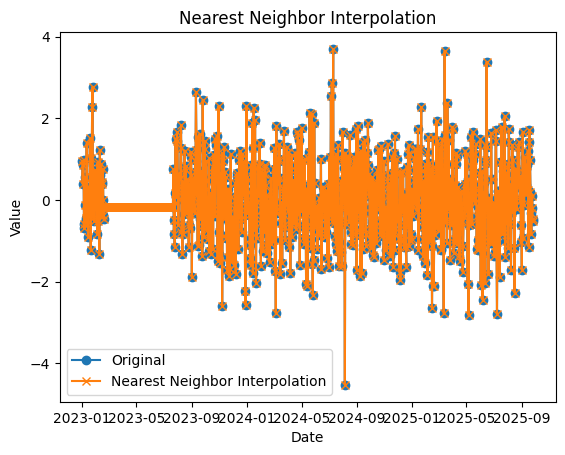

In [ ]:
plt.plot(data['Date'], data['Value'], 'o-', label='Original')
plt.plot(data['Date'], data['Value_filled'], 'x-', label='Nearest Neighbor Interpolation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Nearest Neighbor Interpolation')
plt.legend()
plt.show()

## 결측값 -> 평균값 대체

In [ ]:
dates = pd.date_range(start='2023-01-01', periods=1000, freq='D')
values = np.random.randn(1000)

data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

data.loc[100:200, 'Value'] = np.nan

mean_value = data['Value'].mean()
data['Value_filled'] = data['Value'].fillna(mean_value)
print(data.loc[100:200, 'Value'])

100   NaN
101   NaN
102   NaN
103   NaN
104   NaN
       ..
196   NaN
197   NaN
198   NaN
199   NaN
200   NaN
Name: Value, Length: 101, dtype: float64


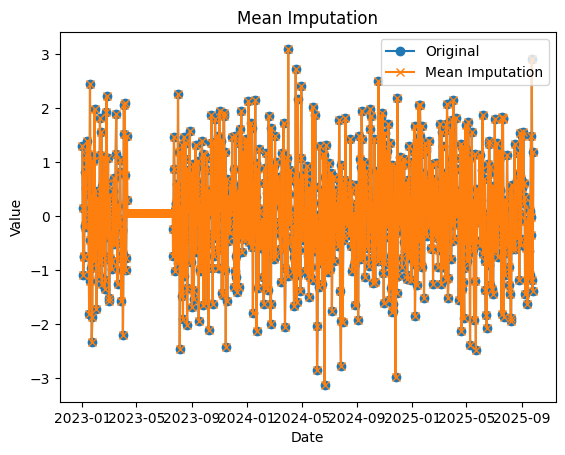

In [ ]:
# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], 'o-', label='Original')
plt.plot(data['Date'], data['Value_filled'], 'x-', label='Mean Imputation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Mean Imputation')
plt.legend()
plt.show()